In [1]:
import os, sys, PIL
import numpy as np
np.random.seed(1234)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
import keras
from keras import backend as K
print 'keras backend: ', K._BACKEND
print 'keras version: ', keras.__version__
print 'tensorflow version: ', tf.__version__

sess = tf.Session()
K.set_session(sess)
# fix input size in model for tensorflow
K.set_image_dim_ordering('th')

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


keras backend:  tensorflow
keras version:  2.0.0
tensorflow version:  1.0.1


Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

In [3]:
TRAINFILE = 'data/train.csv'
TESTFILE = 'data/test.csv'
SUBMISSION = 'submission.csv'

train = pd.read_csv(TRAINFILE)
Xtrain = train.ix[:,1:].values.astype('float32')
ytrain = train.ix[:,0].values.astype('int32')
n_train = Xtrain.shape[0]

Xtrain = Xtrain.reshape(n_train, 1, 28, 28) / 255.0
ytrain = np_utils.to_categorical(ytrain)
num_classes = ytrain.shape[1]

print ytrain.shape
print Xtrain.shape

test = pd.read_csv(TESTFILE)
Xtest = test.ix[:,:].values.astype('float32')
n_test = Xtest.shape[0]
Xtest = Xtest.reshape(n_test, 1, 28, 28) / 255.0

print Xtest.shape

(42000, 10)
(42000, 1, 28, 28)
(28000, 1, 28, 28)


In [11]:
def createModel(nC):
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(32*196, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(nC))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

In [12]:
model = createModel(num_classes)
history = model.fit(Xtrain, ytrain, validation_split=0.1, epochs=20, batch_size=128)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 125s - loss: 0.3545 - acc: 0.8878 - val_loss: 0.1290 - val_acc: 0.9550
Epoch 2/20
37800/37800 [==============================] - 122s - loss: 0.0979 - acc: 0.9692 - val_loss: 0.0809 - val_acc: 0.9736
Epoch 3/20
37800/37800 [==============================] - 119s - loss: 0.0731 - acc: 0.9775 - val_loss: 0.0471 - val_acc: 0.9836
Epoch 4/20
37800/37800 [==============================] - 121s - loss: 0.0591 - acc: 0.9805 - val_loss: 0.0376 - val_acc: 0.9864
Epoch 5/20
37800/37800 [==============================] - 119s - loss: 0.0502 - acc: 0.9842 - val_loss: 0.0519 - val_acc: 0.9833
Epoch 6/20
37800/37800 [==============================] - 115s - loss: 0.0459 - acc: 0.9853 - val_loss: 0.0424 - val_acc: 0.9852
Epoch 7/20
37800/37800 [==============================] - 110s - loss: 0.0411 - acc: 0.9871 - val_loss: 0.0298 - val_acc: 0.9893
Epoch 8/20
37800/37800 [========================

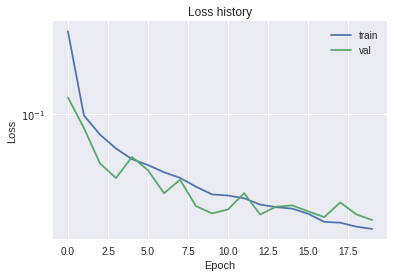

In [13]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.yscale('log')
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [14]:
yhat = model.predict(Xtest, batch_size=128)
ypred = np.argmax(yhat, axis=1)

In [15]:
with open(SUBMISSION, 'w') as f:
    f.write('ImageId,Label\n')
    for i in xrange(0, n_test):
        f.write('%d,%d\n' %(i+1, ypred[i]))

In [16]:
#model.save_weights('mninst.0.99229.hdf')